IMPORTING NECESSARY PACKAGES

In [2]:
import random
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

**READ THE TRAIN FOLDER AND CREATE NEW LISTS DYNAMICALLY ACCORDING TO FOLDER NAME AND APPEND ALL IMAGES TO EACH LIST**



In [3]:
folder_name_list=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

for name in folder_name_list:
    folder_path = './train/'+name
    list_name = name
    globals()[list_name] = []

    for filename in os.listdir(folder_path):
        # Check if the file is an image
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Read the image file
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            # Add the image to the list
            if img is not None:
                globals()[list_name].append((name,img.flatten()))


**Create the train data**



In [4]:
trainData = airplane + bird + automobile + cat + deer + dog + frog + horse + ship + truck

In [5]:
train_labels=[]
data_train = []
for instance in trainData:
   train_labels.append(instance[0])
   data_train.append(instance[1])
    

In [6]:
data_train = np.array(data_train)
data_train.shape

(50000, 3072)

**READ THE TEST FOLDER AND CREATE NEW LISTS DYNAMICALLY ACCORDING TO FOLDER NAME AND APPEND ALL IMAGES TO EACH LIST**



In [7]:
for name in folder_name_list:
    folder_path = './test/'+name
    list_name = name
    globals()[list_name] = []

    for filename in os.listdir(folder_path):
        # Check if the file is an image
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Read the image file
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            # Add the image to the list
            if img is not None:
                globals()[list_name].append((name,img.flatten()))


**Create the test data**



In [8]:
testData = airplane + bird + automobile + cat + deer + dog + frog + horse + ship + truck

In [9]:
test_labels=[]
data_test = []
for instance in testData:
   test_labels.append(instance[0])
   data_test.append(instance[1])    

In [10]:
data_test = np.array(data_test)
data_test.shape

(10000, 3072)

*Print Random Samples from Train and Test Data*

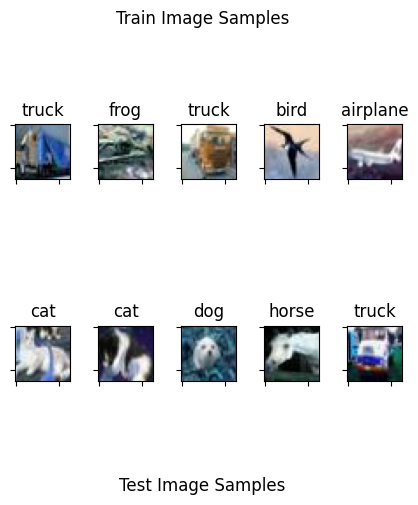

In [12]:
random_numbers1 = []
random_numbers2 = []
trainImages=[]
trainLabels=[]
testImages=[]
testLabels=[]

for i in range(5):
    random_numbers1.append(random.randint(0, 50000))
    random_numbers2.append(random.randint(0, 10000))

for i in random_numbers1:
    instance = trainData[i]
    trainImages.append(instance[1].reshape((32,32,3)))
    trainLabels.append(instance[0])


for i in random_numbers2:
    instance = testData[i]
    testImages.append(instance[1].reshape((32,32,3)))
    testLabels.append(instance[0])

fig, axs = plt.subplots(2, 5, figsize=(5,5))
plt.subplots_adjust(hspace=0.1,wspace=0.5) 


for i in range(5):
    axs[0,i].imshow(trainImages[i])
    axs[0,i].set_title(trainLabels[i]) 
    axs[0,i].set_xticklabels([])
    axs[0,i].set_yticklabels([])
for i in range(5):
    axs[1,i].imshow(testImages[i])
    axs[1,i].set_title(testLabels[i])
    axs[1,i].set_xticklabels([])
    axs[1,i].set_yticklabels([])    

fig.suptitle('Train Image Samples')
fig.supxlabel('Test Image Samples')      
plt.show() 


In [13]:
X_train = data_train
X_test = data_test
y_train = train_labels
y_test = test_labels

Create KNN Classifier for L1 

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier_l1 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
                                  leaf_size=30, p=1, metric='minkowski', metric_params=None, n_jobs=None)
classifier_l1.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_l1.predict(X_test)

Print the accuracy for KNN (L1)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.3683


Create Continuous Labels from Categorical Labels

In [17]:
labels=[]

for i in range(len(train_labels)):
    if train_labels[i]=='airplane':
        labels.append(1)
    if train_labels[i]=='automobile':
        labels.append(2)
    if train_labels[i]=='bird':
        labels.append(3)
    if train_labels[i]=='cat':
        labels.append(4)
    if train_labels[i]=='deer':
        labels.append(5)
    if train_labels[i]=='dog':
        labels.append(6)
    if train_labels[i]=='frog':
        labels.append(7)
    if train_labels[i]=='horse':
        labels.append(8)  
    if train_labels[i]=='ship':
        labels.append(9)  
    if train_labels[i]=='truck':
        labels.append(10)                                                                   

In [18]:
len(labels)

50000

In [19]:
labels = np.array(labels)

In [20]:
from sklearn.preprocessing import normalize
data_train_normalized = normalize(data_train)

**L1 Manhattan Distance**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset and labels
dataset = data_train_normalized

k_choices = [3,5,7,9,11] 

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)
accuracies = []
k_to_accuracies_L1= {}

for k in k_choices:
    k_to_accuracies_L1[k] = []
    for train_index, test_index in kf.split(dataset):

        X_train, X_test = dataset[train_index], dataset[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        
        knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree', p=1, n_jobs=-1)

        knn.fit(X_train, y_train)
 
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        k_to_accuracies_L1[k].append(accuracy)
    
print("Printing our 5-fold accuracies for varying values of k (L1- Manhattan Distance):")
print()
for k in sorted(k_to_accuracies_L1):
    for accuracy in k_to_accuracies_L1[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

In [ ]:
for k in k_choices:
    accuracies = k_to_accuracies_L1[k]
    plt.scatter([k] * len(accuracies), accuracies)

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies_L1.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies_L1.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k (L1: Manhattan Distance)')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

**L2 Eucladian Distance**

In [21]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
dataset = data_train_normalized

k_choices = [3,5,7,9,11] 

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)
accuracies2 = []
k_to_accuracies_L2= {}


for k in k_choices:
    k_to_accuracies_L2[k] = []
    for train_index, test_index in kf.split(dataset):

        X_train, X_test = dataset[train_index], dataset[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
  
        knn = KNeighborsClassifier(n_neighbors=k, p=2)
        knn.fit(X_train, y_train)
       
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies2.append(accuracy)
        k_to_accuracies_L2[k].append(accuracy)
    
print("Printing our 5-fold accuracies for varying values of k (L1- Eucladian Distance):")
print()
for k in sorted(k_to_accuracies_L2):
    for accuracy in k_to_accuracies_L2[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

Printing our 5-fold accuracies for varying values of k (L1- Eucladian Distance):

k = 3, accuracy = 0.348100
k = 3, accuracy = 0.348400
k = 3, accuracy = 0.347200
k = 3, accuracy = 0.342200
k = 3, accuracy = 0.348000
k = 5, accuracy = 0.353900
k = 5, accuracy = 0.350000
k = 5, accuracy = 0.358000
k = 5, accuracy = 0.350800
k = 5, accuracy = 0.353400
k = 7, accuracy = 0.360600
k = 7, accuracy = 0.352600
k = 7, accuracy = 0.354900
k = 7, accuracy = 0.349400
k = 7, accuracy = 0.352000
k = 9, accuracy = 0.355000
k = 9, accuracy = 0.355300
k = 9, accuracy = 0.348800
k = 9, accuracy = 0.353500
k = 9, accuracy = 0.355600
k = 11, accuracy = 0.349700
k = 11, accuracy = 0.357200
k = 11, accuracy = 0.352000
k = 11, accuracy = 0.365000
k = 11, accuracy = 0.340300


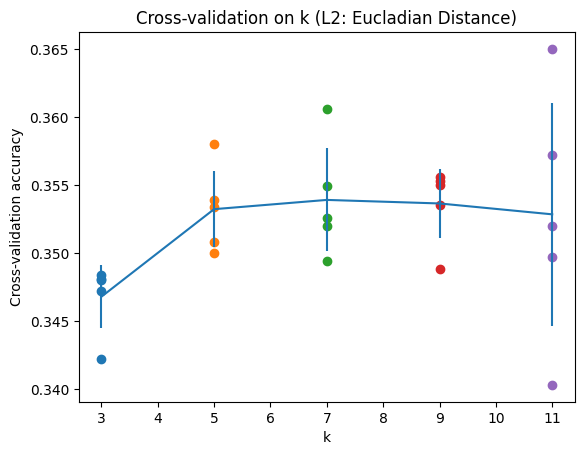

In [22]:
for k in k_choices:
    accuracies2 = k_to_accuracies_L2[k]
    plt.scatter([k] * len(accuracies2), accuracies2)
    
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies_L2.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies_L2.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k (L2: Eucladian Distance)')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

**Discussion**

First of all the necessary packages were imported. Then a list of all the folder name was created. Then according to each name of a folder from the train folder, a list was created and each element of that list was a tulpe which had the image array and the label or folder name. Each image array was flatten in order to transform it to an one-dimensional array. Then all the lists created by the train folder were combined as the trainData. From the trainData, two lists were created, one had all the image arrays and one had all the corresponding labels. Then both were transformed into numpy arrays. The same processes were done for the test folder as well. After that 5 random images from the train and test array were shown. The images had to be reshaped in order to visualize them. Then KNN classifier for L1 or *Manhattan distance* method was performed with the train and test datasets. For the same method, K-Fold cross validation was talking too much time to execute, so it had to be skipped. Then KNN Classifier for L2 method or *Eucladian distance* method was performed and this time K-fold was executed successfully. 5 different values for hyperparameter K was taken and sk-learn library was used. After performing each fold , all the accuracies for different values of K were stored in a dictionary. Then finally a graph was generated which shows all the accuracies for each fold and their mean value to check which k-value has the highest accuracy. Here from the graph it's seen that *k=7* has the highest mean value which can be called better fit for the dataset.